In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_validate, train_test_split
from sklearn.metrics import r2_score
import warnings
import joblib

In [35]:
warnings.filterwarnings("ignore")

In [36]:
df = pd.read_csv("istanbul.csv")

In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

In [38]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [39]:
df.drop("Sehir",axis=1,inplace=True)

In [40]:
df_before_onehot = df.copy()

In [41]:
df.head()

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Ilce,Mahalle
0,2950000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,4,Boş,NaN,1,NaN,NaN,Adalar,Heybeliada Mahallesi
1,9450000,6,2,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,170,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,Adalar,Maden Mahallesi
2,3550000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,3,Boş,NaN,1,NaN,NaN,Adalar,Heybeliada Mahallesi
3,15300000,6,6,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,250,21 Ve Üzeri,6,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,Adalar,Burgazada Mahallesi
4,13000000,5,2,Kat Kaloriferi,Krediye Uygun,İkinci El,NaN,NaN,Hayır,230,21 Ve Üzeri,3,Boş,NaN,2,NaN,NaN,Adalar,Heybeliada Mahallesi


In [42]:
def one_hot_encoder(dataframe, categorical_col, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns = categorical_col, drop_first=drop_first)
    return dataframe

In [43]:
cat_col = ["Isıtma Tipi","Krediye Uygunluk","Yapı Durumu","Tapu Durumu","Eşya Durumu","Site İçerisinde","Binanın Yaşı","Kullanım Durumu","Yatırıma Uygunluk","Ilce","Mahalle"]

In [44]:
df = one_hot_encoder(df, cat_col)

In [45]:
df.head()

,Fiyat,Oda Sayısı,Bulunduğu Kat,Brüt Metrekare,Binanın Kat Sayısı,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Isıtma Tipi_Doğalgaz Sobalı,Isıtma Tipi_Elektrikli Radyatör,Isıtma Tipi_Fancoil Ünitesi,Isıtma Tipi_Güneş Enerjisi,Isıtma Tipi_Isıtma Yok,Isıtma Tipi_Jeotermal,Isıtma Tipi_Kat Kaloriferi,Isıtma Tipi_Klimalı,Isıtma Tipi_Kombi Doğalgaz,Isıtma Tipi_Kombi Fueloil,Isıtma Tipi_Kombi Kömür,Isıtma Tipi_Merkezi (Pay Ölçer),Isıtma Tipi_Merkezi Doğalgaz,Isıtma Tipi_Merkezi Fueloil,Isıtma Tipi_Merkezi Kömür,Isıtma Tipi_Sobalı,Isıtma Tipi_VRV,Isıtma Tipi_Yerden Isıtma,Krediye Uygunluk_Krediye Uygun,Krediye Uygunluk_Krediye Uygun Değil,Yapı Durumu_Sıfır,Yapı Durumu_Yapım Aşamasında,Yapı Durumu_İkinci El,Tapu Durumu_Arsa Tapulu,Tapu Durumu_Hisseli Tapu,Tapu Durumu_Kat Mülkiyeti,Tapu Durumu_Kat İrtifakı,Tapu Durumu_Müstakil Tapulu,Eşya Durumu_Boş,Eşya Durumu_Eşyalı,Site İçerisinde_Evet,Site İçerisinde_Hayır,Binanın Yaşı_0 (Yeni),Binanın Yaşı_1,Binanın Yaşı_11-15,Binanın Yaşı_16-20,Binanın Yaşı_2,Binanın Yaşı_21 Ve Üzeri,Binanın Yaşı_3,Binanın Yaşı_4,Binanın Yaşı_5-10,Kullanım Durumu_Boş,Kullanım Durumu_Kiracı Oturuyor,Kullanım Durumu_Mülk Sahibi Oturuyor,Yatırıma Uygunluk_Yatırıma Uygun,Yatırıma Uygunluk_Yatırıma Uygun Değil,Ilce_Adalar,Ilce_Arnavutköy,Ilce_Ataşehir,Ilce_Avcılar,Ilce_Bahçelievler,Ilce_Bakırköy,Ilce_Bayrampaşa,Ilce_Bağcılar,Ilce_Başakşehir,Ilce_Beykoz,Ilce_Beylikdüzü,Ilce_Beyoğlu,Ilce_Beşiktaş,Ilce_Büyükçekmece,Ilce_Esenler,Ilce_Esenyurt,Ilce_Eyüpsultan,Ilce_Fatih,Ilce_Gaziosmanpaşa,Ilce_Güngören,Ilce_Kadıköy,Ilce_Kartal,Ilce_Kağıthane,Ilce_Küçükçekmece,Ilce_Maltepe,Ilce_Pendik,Ilce_Sancaktepe,Ilce_Sarıyer,Ilce_Silivri,Ilce_Sultanbeyli,Ilce_Sultangazi,Ilce_Tuzla,Ilce_Zeytinburnu,Ilce_Çatalca,Ilce_Çekmeköy,Ilce_Ümraniye,Ilce_Üsküdar,Ilce_Şile,Ilce_Şişli,Mahalle_100. Yıl Mahallesi,Mahalle_15 Temmuz Mahallesi,Mahalle_19 Mayıs Mahallesi,Mahalle_5. Levent Mahallesi,Mahalle_50. Yıl Mahallesi,Mahalle_75. Yıl Mahallesi,Mahalle_Abbasağa Mahallesi,Mahalle_Abdurrahman Nafiz Gürman Mahallesi,Mahalle_Abdurrahmangazi Mahallesi,Mahalle_Acıbadem Mahallesi,Mahalle_Adem Yavuz Mahallesi,Mahalle_Adil Mahallesi,Mahalle_Adnan Kahveci Mahallesi,Mahalle_Adnan Menderes Mahallesi,Mahalle_Ahmediye Mahallesi,Mahalle_Ahmet Yesevi Mahallesi,Mahalle_Ahmetli Mahallesi,Mahalle_Akat Mahallesi,Mahalle_Akevler Mahallesi,Mahalle_Akpınar Mahallesi,Mahalle_Aksaray Mahallesi,Mahalle_Akçaburgaz Mahallesi,Mahalle_Akıncılar Mahallesi,Mahalle_Akşemseddin Mahallesi,Mahalle_Akşemsettin Mahallesi,Mahalle_Alemdağ Mahallesi,Mahalle_Ali Kuşçu Mahallesi,Mahalle_Alibey Mahallesi,Mahalle_Alibeyköy Mahallesi,Mahalle_Alipaşa Mahallesi,Mahalle_Alkent 2000 Mahallesi,Mahalle_Altayçeşme Mahallesi,Mahalle_Altunizade Mahallesi,Mahalle_Altıntepe Mahallesi,Mahalle_Altıntepsi Mahallesi,Mahalle_Altınşehir Mahallesi,Mahalle_Ambarlı Mahallesi,Mahalle_Anadolu Hisarı Mahallesi,Mahalle_Anadolu Kavağı Mahallesi,Mahalle_Anadolu Mahallesi,Mahalle_Arap Cami Mahallesi,Mahalle_Ardıçlı Mahallesi,Mahalle_Armağanevler Mahallesi,Mahalle_Arnavutköy Mahallesi,Mahalle_Arnavutköy Merkez Mahallesi,Mahalle_Atakent Mahallesi,Mahalle_Ataköy 2-5-6. Kısım Mahallesi,Mahalle_Ataköy 3-4-11. Kısım Mahallesi,Mahalle_Ataköy 7-8-9-10. Kısım Mahallesi,Mahalle_Atalar Mahallesi,Mahalle_Atatürk Mahallesi,Mahalle_Atikali Mahallesi,Mahalle_Ayazağa Mahallesi,Mahalle_Aydınevler Mahallesi,Mahalle_Aydınlar Mahallesi,Mahalle_Aydınlı Mahallesi,Mahalle_Aydıntepe Mahallesi,Mahalle_Ayvansaray Mahallesi,Mahalle_Aziz Mahmut Hüdayi Mahallesi,Mahalle_Ağva Merkez Mahallesi,Mahalle_Aşağı Dudullu Mahallesi,Mahalle_Aşık Veysel Mahallesi,Mahalle_Aşıkveysel Mahallesi,Mahalle_Bahçeköy Kemer Mahallesi,Mahalle_Bahçeköy Merkez Mahallesi,Mahalle_Bahçeköy Yeni Mahallesi,Mahalle_Bahçelievler Mahallesi,Mahalle_Bahçeşehir 1. Kısım Mahallesi,Mahalle_Bahçeşehir 2. Kısım Mahallesi,Mahalle_Balat Mahallesi,Mahalle_Balibey Mahallesi,Mahalle_Balmumcu Mahallesi,Mahalle_Baltalimanı Mahallesi,Mahalle_Balıkyolu Mahallesi,Mahalle_Barbaros Hayrettin Paşa Mahallesi,Ma

In [46]:
y = df["Fiyat"]
X = df.drop(["Fiyat"], axis=1)

In [65]:
df_before_onehot.head(10)

,Fiyat,Oda Sayısı,Bulunduğu Kat,Isıtma Tipi,Krediye Uygunluk,Yapı Durumu,Tapu Durumu,Eşya Durumu,Site İçerisinde,Brüt Metrekare,Binanın Yaşı,Binanın Kat Sayısı,Kullanım Durumu,Yatırıma Uygunluk,Banyo Sayısı,Balkon Sayısı,WC Sayısı,Ilce,Mahalle
0,2950000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,4,Boş,NaN,1,NaN,NaN,Adalar,Heybeliada Mahallesi
1,9450000,6,2,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,170,21 Ve Üzeri,3,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,Adalar,Maden Mahallesi
2,3550000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Boş,Hayır,85,21 Ve Üzeri,3,Boş,NaN,1,NaN,NaN,Adalar,Heybeliada Mahallesi
3,15300000,6,6,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,250,21 Ve Üzeri,6,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,Adalar,Burgazada Mahallesi
4,13000000,5,2,Kat Kaloriferi,Krediye Uygun,İkinci El,NaN,NaN,Hayır,230,21 Ve Üzeri,3,Boş,NaN,2,NaN,NaN,Adalar,Heybeliada Mahallesi
5,15000000,5,2,Klimalı,Krediye Uygun,NaN,Kat Mülkiyeti,NaN,Evet,220,21 Ve Üzeri,2,Mülk Sahibi Oturuyor,NaN,2,NaN,NaN,Adalar,Burgazada Mahallesi
6,11990000,5,2,Kombi Doğalgaz,Krediye Uygun,İkinci El,NaN,Boş,Hayır,160,21 Ve Üzeri,4,Boş,NaN,2,NaN,1.000,Adalar,Burgazada Mahallesi
7,7500000,3,1,Kombi Doğalgaz,Krediye Uygun,NaN,NaN,Eşyalı,Hayır,130,21 Ve Üzeri,4,Boş,NaN,1,NaN,NaN,Adalar,Nizam Mahallesi
8,2995000,3,2,Kombi Doğalgaz,Krediye Uygun,İkinci El,NaN,NaN,Hayır,65,21 Ve Üzeri,3,Boş,NaN,1,NaN,NaN,Adalar,Heybeliada Mahallesi
9,8300000,4,2,Klimalı,Krediye Uygun,İkinci El,Kat Mülkiyeti,NaN,Hayır,120,21 Ve Üzeri,4,Boş,NaN,1,3.000,1.000,Adalar,Kınalıada Mahallesi


In [47]:
def set_model(model_list, X, y,name="istanbul"):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

    dataf = pd.DataFrame()

    for i in range(len(model_list)):
        algo_name = model_list[i][0]
        algo = model_list[i][1]

        model = algo.fit(X_train, y_train)

        cv_result = cross_val_score(model,
                                    X_train, y_train,
                                    cv=5,
                                    scoring="neg_mean_squared_error")

        y_pred = model.predict(X_test)
        rmse = np.mean(np.sqrt(-cv_result))

        r2 = r2_score(y_test, y_pred)

        n= len(X_train)
        p =len(X.columns)
        adj_R2 = 1- ((1-r2) * (n-1)/(n-p-1))

        data_list = {"İsim" : name,
                     "Model": algo_name,
                     "TestDeger": rmse,
                     "MSE":mean_squared_error(y_test, y_pred),
                     "RMSE": (np.sqrt(mean_squared_error(y_test, y_pred))),
                     "MAE": mean_absolute_error(y_test, y_pred),
                     "r2" : r2,
                     "Adjusted R2" : adj_R2}

        dataf = dataf.append(data_list, ignore_index=True)

    return dataf, model

In [48]:
models = []
#models.append(('Gradient Boosting Regressor', GradientBoostingRegressor()))
models.append(('XGBModel', XGBRegressor(objective="reg:squarederror",use_label_encoder=False)))
#models.append(('LGBMModel', LGBMRegressor(use_missing=False)))
#models.append(('LRModel', LinearRegression()))
#models.append(('RFModel', RandomForestRegressor()))

In [49]:
df_model, model = set_model(models, X, y)
df_model

,İsim,Model,TestDeger,MSE,RMSE,MAE,r2,Adjusted R2
0,istanbul,XGBModel,1097241.222,1162212149794.214,1078059.437,694672.093,0.829,0.822


In [50]:
df.describe([0.05,0.25, 0.75,0.90,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,99%,max
Fiyat,25908.000,3793168.874,2653393.441,1000000.000,1395000.000,2150000.000,3000000.000,4500000.000,6750000.000,15000000.000,19500000.000
Oda Sayısı,25908.000,3.486,0.988,1.000,2.000,3.000,3.000,4.000,5.000,7.000,10.000
Bulunduğu Kat,25908.000,3.119,3.224,-4.000,0.000,1.000,2.000,4.000,6.000,16.000,40.000
Brüt Metrekare,25908.000,117.137,41.122,27.000,70.000,90.000,110.000,135.000,168.300,250.000,1000.000
Binanın Kat Sayısı,25908.000,6.581,4.842,1.000,3.000,4.000,5.000,7.000,12.000,30.000,99.000
Banyo Sayısı,25908.000,1.332,0.526,1.000,1.000,1.000,1.000,2.000,2.000,3.000,5.000
Balkon Sayısı,6274.000,1.300,0.525,1.000,1.000,1.000,1.000,2.000,2.000,3.000,3.000
WC Sayısı,9364.000,1.374,0.539,1.000,1.000,1.000,1.000,2.000,2.000,3.000,4.000
Isıtma Tipi_Doğalgaz Sobalı,25908.000,0.009,0.094,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
Isıtma Tipi_Elektrikli Radyatör,25908.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000


In [53]:
sehir_model = joblib.dump(model, "istanbul.pkl")

In [68]:
df.to_csv("encode_istanbul.csv")

In [69]:
df.to_excel("encode_istanbul.xlsx")

In [56]:
df_before_onehot.to_excel("istanbul.xlsx")

In [117]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": features.columns})
    plt.figure(figsize=(5, 5))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:15])
    plt.title("Features")
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig("importances.png")

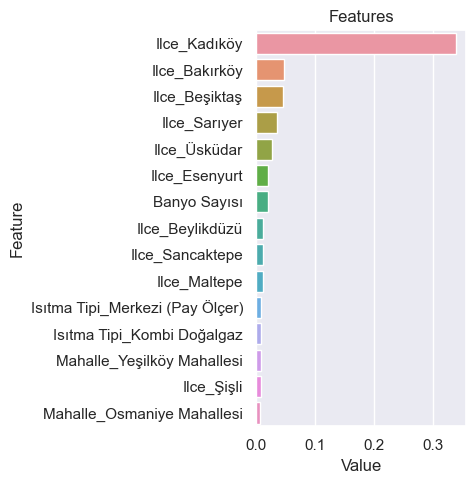

In [118]:
plot_importance(model,X)

In [83]:
num_samples = int(0.20 * len(df)) 
sample_indices = np.random.choice(len(df), num_samples, replace=False)
sample_data = df.iloc[sample_indices]

y_test_sample = sample_data['Fiyat'] 
X_test_sample = sample_data.drop(columns=['Fiyat']) 

y_pred_sample = model.predict(X_test_sample)

mse = mean_squared_error(y_test_sample, y_pred_sample)
rmse = mean_squared_error(y_test_sample, y_pred_sample,squared=False)
mae = mean_absolute_error(y_test_sample, y_pred_sample)
r2 = r2_score(y_test_sample, y_pred_sample)

# Hata metriklerini görüntüleyelim
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R2 Skor: {r2:.2f}")

MSE: 817632981574.45
RMSE: 904230.60
MAE: 616190.68
R2 Skor: 0.89


In [84]:
y_pred_sample

array([3628971.2, 2409555.5, 2183511.5, ..., 2396668. , 4667190.5,
       2765708.2], dtype=float32)

In [85]:
y_test_sample

462       2550000
1381      2250000
8007      2200000
18519     1660000
12977     4500000
9199      2000000
10242     1349000
4922      4500000
21696     2570000
11106     4155000
18934     5560000
14747     4250000
6099      2980000
17        2400000
15738     1560000
194       4000000
19171     4700000
24242     3900000
20405     2150000
262       4600000
15624     7500000
11303     1775000
8828      1875000
7755      5500000
2852      1950000
24846     4200000
21672     2245000
16410     2000000
23184     1650000
6381      4000000
19302     4600000
4546      2250000
17327     6500000
25030     1550000
1992      4500000
6305      4800000
4174      7250000
15021     4200000
19660     2600000
4739      3400000
14652     3600000
10370     1950000
11975     1900000
24294     4500000
8795      4000000
19945     3400000
25015     4600000
17613     3050000
5831      3000000
22064     2950000
20363     2097000
9908      1238000
15976     1600000
15504     6650000
14899     2750000
25407     

In [86]:
tahmin = pd.DataFrame({"Tahmin Edilen": y_pred_sample})

In [93]:
tahmin

,Tahmin Edilen
0,3628971.250
1,2409555.500
2,2183511.500
3,1983608.250
4,4310275.000
5,2482076.000
6,1709107.250
7,4730652.500
8,2399996.500
9,4995031.500


In [94]:
gercek = y_test_sample.to_frame(name="Gerçek Fiyat").reset_index()

In [95]:
gercek

,index,Gerçek Fiyat
0,462,2550000
1,1381,2250000
2,8007,2200000
3,18519,1660000
4,12977,4500000
5,9199,2000000
6,10242,1349000
7,4922,4500000
8,21696,2570000
9,11106,4155000


In [98]:
merged_df = pd.concat([gercek, tahmin],axis=1)

In [102]:
merged_df["Fark"] = merged_df["Tahmin Edilen"] - merged_df["Gerçek Fiyat"]

In [104]:
merged_df.sort_values("Fark")

,index,Gerçek Fiyat,Tahmin Edilen,Fark
2886,25605,10000000,2503094.250,-7496905.750
4423,5317,14615700,7956131.000,-6659569.000
4397,25612,7500000,1664773.375,-5835226.625
1067,14088,17500000,11848637.000,-5651363.000
1703,4068,13500000,7985302.500,-5514697.500
1401,25592,13000000,7794038.000,-5205962.000
3483,5319,12500000,7792601.500,-4707398.500
3417,14067,14000000,9297008.000,-4702992.000
4245,10696,7750000,3075777.000,-4674223.000
4075,7686,8000000,3492217.000,-4507783.000


In [111]:
df.index

RangeIndex(start=0, stop=25908, step=1)